In [3]:
import pandas as pd
import numpy as np

In [4]:
chollos_df = pd.read_csv('../chollos.csv')
chollos_df

,Procesador,RAM,Tipo RAM,Almacenamiento,Graficos,Pantalla,Resolucion,Sistema Operativo,Bateria,Precio,Chollo,Probabilidad_Chollo
0,Intel Core i5-1135G7,8.0,DDR4,512.0,Intel Iris Xe Graphics,15.6,1920x1080,No,70.0,549.00,1,0.99
1,AMD Ryzen 7-8845HS,32.0,DDR5,1.0,AMD Radeon 780M,17.3,2560x1440,Windows 11 Home,83.0,1862.41,0,0.01
2,Intel Core i7-14650HX,32.0,DDR5,1.0,Intel® UHD Graphics,16.1,1920x1080,FreeDOS,70.0,1471.11,0,0.34
3,Intel Core i7-12650H,16.0,DDR4,512.0,Intel® UHD Graphics,15.6,1920x1080,FreeDOS,70.0,960.46,1,0.99
4,AMD Ryzen 7-8845HS,32.0,DDR5,1.0,AMD Radeon 780M,17.3,1920x1080,FreeDOS,83.0,1471.11,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Intel Core i7-1255U,8.0,DDR4,512.0,Intel Iris Xe Graphics,15.6,1920x1080,No,38.0,782.99,1,1.00
243,Intel Core Ultra 9-185H,32.0,DDR5,2.0,Intel Arc Graphics,14.0,2880x1800,Windows 11 Home,75.0,2599.00,0,0.34
244,AMD Ryzen 5-7520U,8.0,DDR5,512.0,AMD Radeon 610M,15.6,1920x1080,Windows 11 Home,42.0,599.00,0,0.12
245,AMD Ryzen AI 9 HX-370,32.0,DDR5,1.0,AMD Radeon 890M,13.3,2880x1800,Windows 11 Home,73.0,2199.00,0,0.00


In [5]:
chollos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Procesador           247 non-null    object 
 1   RAM                  245 non-null    float64
 2   Tipo RAM             212 non-null    object 
 3   Almacenamiento       238 non-null    float64
 4   Graficos             229 non-null    object 
 5   Pantalla             246 non-null    float64
 6   Resolucion           245 non-null    object 
 7   Sistema Operativo    236 non-null    object 
 8   Bateria              233 non-null    float64
 9   Precio               246 non-null    float64
 10  Chollo               247 non-null    int64  
 11  Probabilidad_Chollo  247 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 23.3+ KB


# RAM

In [6]:
chollos_df['RAM'].isnull().sum()

np.int64(2)

In [7]:
# Eliminar les files amb valors nuls a la columna RAM
chollos_df = chollos_df.dropna(subset=['RAM'])
chollos_df['RAM'].isnull().sum()

np.int64(0)

In [8]:
chollos_df['RAM'].unique()

array([ 8., 32., 16., 64., 24., 36., 48.])

# Tipo RAM

In [9]:
chollos_df['Tipo RAM'].isnull().sum()

np.int64(33)

In [10]:
tipoRAM_moda = chollos_df['Tipo RAM'].mode()[0]
chollos_df['Tipo RAM'].fillna(tipoRAM_moda, inplace=True)
chollos_df['Tipo RAM'].isnull().sum()

C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\2287635016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chollos_df['Tipo RAM'].fillna(tipoRAM_moda, inplace=True)
C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\2287635016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chollos_df['Tipo RAM'].fillna(tipoRAM_moda, inplace=True)


np.int64(0)

# Almacenamiento

In [11]:
chollos_df['Almacenamiento'].isnull().sum()

np.int64(7)

In [12]:
# Eliminar les files amb valors nuls a la columna Almacenamiento
chollos_df = chollos_df.dropna(subset=['Almacenamiento'])
chollos_df['Almacenamiento'].isnull().sum()

np.int64(0)

In [13]:
# Convertir els valors de la columna Almacenamiento a MB
#chollos_df['Almacenamiento'] = np.where(chollos_df['Almacenamiento'].isin([1, 2]), chollos_df['Almacenamiento'] * 1000, chollos_df['Almacenamiento'])
chollos_df['Almacenamiento'] = chollos_df['Almacenamiento'].apply(lambda x: x * 1000 if x in [1, 2] else x)
chollos_df['Almacenamiento']

0       512.0
1      1000.0
2      1000.0
3       512.0
4      1000.0
        ...  
242     512.0
243    2000.0
244     512.0
245    1000.0
246     512.0
Name: Almacenamiento, Length: 238, dtype: float64

In [14]:
chollos_df['Almacenamiento'].value_counts()

Almacenamiento
512.0     111
1000.0     88
256.0      35
2000.0      2
128.0       2
Name: count, dtype: int64

# Gráficos

In [15]:
chollos_df['Graficos'].isnull().sum()

np.int64(10)

In [16]:
# Omplir els valors nuls de la columna Gràfics amb 'Intel® UHD Graphics' si el procesador és de la marca Intel
chollos_df['Graficos'] = chollos_df.apply(
    lambda row: 'Intel® UHD Graphics' if pd.isnull(row['Graficos']) and 'Intel' in row['Procesador'] else row['Graficos'],
    axis=1
)
chollos_df['Graficos'].isnull().sum()

np.int64(1)

In [17]:
chollos_df = chollos_df.dropna(subset=['Graficos'])
chollos_df['Graficos'].isnull().sum()

np.int64(0)

# Pantalla

In [18]:
chollos_df['Pantalla'].isnull().sum()

np.int64(1)

In [19]:
chollos_df = chollos_df.dropna(subset=['Pantalla'])
chollos_df['Pantalla'].isnull().sum()

np.int64(0)

# Resolución

In [20]:
chollos_df['Resolucion'].isnull().sum()

np.int64(1)

In [21]:
chollos_df['Resolucion'].mode()[0]

'1920x1080'

In [22]:
chollos_df['Resolucion'].fillna(chollos_df['Resolucion'].mode()[0], inplace=True)
chollos_df['Resolucion'].isnull().sum()

C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\3967496064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chollos_df['Resolucion'].fillna(chollos_df['Resolucion'].mode()[0], inplace=True)


np.int64(0)

# Sistema Operativo

In [23]:
chollos_df['Sistema Operativo'] = chollos_df['Sistema Operativo'].replace('No', 'FreeDOS')
chollos_df['Sistema Operativo'] = chollos_df['Sistema Operativo'].replace('FreeDos', 'FreeDOS')
chollos_df['Sistema Operativo'] = chollos_df['Sistema Operativo'].replace('Windows 11', 'Windows 11 Home')
chollos_df['Sistema Operativo']

0              FreeDOS
1      Windows 11 Home
2              FreeDOS
3              FreeDOS
4              FreeDOS
            ...       
242            FreeDOS
243    Windows 11 Home
244    Windows 11 Home
245    Windows 11 Home
246     Windows 11 Pro
Name: Sistema Operativo, Length: 236, dtype: object

In [24]:
chollos_df[chollos_df['Sistema Operativo'].isnull()]

,Procesador,RAM,Tipo RAM,Almacenamiento,Graficos,Pantalla,Resolucion,Sistema Operativo,Bateria,Precio,Chollo,Probabilidad_Chollo
26,Intel Core Ultra 7-155H,32.0,DDR5,1000.0,Intel® UHD Graphics,14.0,1920x1200,NaN,56.0,1849.99,1,0.70
41,Intel Core i5-,16.0,DDR4,512.0,Intel® UHD Graphics,14.0,1920x1080,NaN,43.0,864.99,1,0.96
50,Intel Core Ultra 7-155H,64.0,DDR5,1000.0,Intel® UHD Graphics,16.0,1920x1200,NaN,76.0,1979.20,1,0.63


In [25]:
chollos_df['Sistema Operativo'].fillna(chollos_df['Sistema Operativo'].mode()[0], inplace=True)
chollos_df['Sistema Operativo'].isnull().sum()

np.int64(0)

# Batería

In [26]:
Q1 = chollos_df['Bateria'].quantile(0.25)
Q3 = chollos_df['Bateria'].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = chollos_df[(chollos_df['Bateria'] < lower_bound) | (chollos_df['Bateria'] > upper_bound)]
outliers

,Procesador,RAM,Tipo RAM,Almacenamiento,Graficos,Pantalla,Resolucion,Sistema Operativo,Bateria,Precio,Chollo,Probabilidad_Chollo
246,Intel Core i5-1340P,16.0,DDR5,512.0,Intel Iris Xe Graphics,15.0,1920x1080,Windows 11 Pro,9360.0,1219.99,1,0.95


In [27]:
# Calcular la moda de la columna Bateria
bateria_moda = chollos_df['Bateria'].mode()[0]

# Aplicar la moda a los outliers en la columna Bateria
chollos_df.loc[outliers.index, 'Bateria'] = bateria_moda
chollos_df.loc[outliers.index]

,Procesador,RAM,Tipo RAM,Almacenamiento,Graficos,Pantalla,Resolucion,Sistema Operativo,Bateria,Precio,Chollo,Probabilidad_Chollo
246,Intel Core i5-1340P,16.0,DDR5,512.0,Intel Iris Xe Graphics,15.0,1920x1080,Windows 11 Pro,41.0,1219.99,1,0.95


In [28]:
chollos_df['Bateria'].isnull().sum()

np.int64(12)

In [29]:
chollos_df['Bateria'].mode()[0]

np.float64(41.0)

In [30]:
chollos_df['Bateria'].fillna(chollos_df['Bateria'].mode()[0], inplace=True)

C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\2917780151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chollos_df['Bateria'].fillna(chollos_df['Bateria'].mode()[0], inplace=True)


# Precio

In [31]:
chollos_df['Precio'].isnull().sum()

np.int64(1)

In [32]:
chollos_df = chollos_df.dropna(subset=['Precio'])
chollos_df['Precio'].isnull().sum()

np.int64(0)

# Eliminar columna 'Probabilidad Chollo'

In [33]:
chollos_df = chollos_df.drop(columns=['Probabilidad_Chollo'])
chollos_df

,Procesador,RAM,Tipo RAM,Almacenamiento,Graficos,Pantalla,Resolucion,Sistema Operativo,Bateria,Precio,Chollo
0,Intel Core i5-1135G7,8.0,DDR4,512.0,Intel Iris Xe Graphics,15.6,1920x1080,FreeDOS,70.0,549.00,1
1,AMD Ryzen 7-8845HS,32.0,DDR5,1000.0,AMD Radeon 780M,17.3,2560x1440,Windows 11 Home,83.0,1862.41,0
2,Intel Core i7-14650HX,32.0,DDR5,1000.0,Intel® UHD Graphics,16.1,1920x1080,FreeDOS,70.0,1471.11,0
3,Intel Core i7-12650H,16.0,DDR4,512.0,Intel® UHD Graphics,15.6,1920x1080,FreeDOS,70.0,960.46,1
4,AMD Ryzen 7-8845HS,32.0,DDR5,1000.0,AMD Radeon 780M,17.3,1920x1080,FreeDOS,83.0,1471.11,0
...,...,...,...,...,...,...,...,...,...,...,...
242,Intel Core i7-1255U,8.0,DDR4,512.0,Intel Iris Xe Graphics,15.6,1920x1080,FreeDOS,38.0,782.99,1
243,Intel Core Ultra 9-185H,32.0,DDR5,2000.0,Intel Arc Graphics,14.0,2880x1800,Windows 11 Home,75.0,2599.00,0
244,AMD Ryzen 5-7520U,8.0,DDR5,512.0,AMD Radeon 610M,15.6,1920x1080,Windows 11 Home,42.0,599.00,0
245,AMD Ryzen AI 9 HX-370,32.0,DDR5,1000.0,AMD Radeon 890M,13.3,2880x1800,Windows 11 Home,73.0,2199.00,0


In [34]:
chollos_df.isnull().sum()

Procesador           0
RAM                  0
Tipo RAM             0
Almacenamiento       0
Graficos             0
Pantalla             0
Resolucion           0
Sistema Operativo    0
Bateria              0
Precio               0
Chollo               0
dtype: int64

In [35]:
chollos_df['Chollo'].value_counts()

Chollo
0    123
1    112
Name: count, dtype: int64

# Visualitzar dades

C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\2271271381.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Chollo', y='Precio', data=chollos_df, palette='Set2')
C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\2271271381.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Chollo', data=chollos_df, palette='Set1')
C:\Users\rosel\AppData\Local\Temp\ipykernel_1684\2271271381.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_procesadores.index, x=top_procesadores.values, palette='viridis', ax=ax5)


Estadísticas Descriptivas:

          RAM  Almacenamiento  Pantalla  Bateria   Precio
count  235.00          235.00    235.00   235.00   235.00
mean    18.23          661.86     15.31    57.43  1250.38
std      9.59          308.15      1.11    17.40   791.24
min      8.00          128.00     12.40    38.00   258.99
25%     16.00          512.00     14.20    41.00   630.50
50%     16.00          512.00     15.60    54.00  1098.99
75%     20.00         1000.00     15.60    70.00  1572.47
max     64.00         2000.00     23.50   100.00  4553.33

Porcentaje de Chollos en el dataset: 47.66%


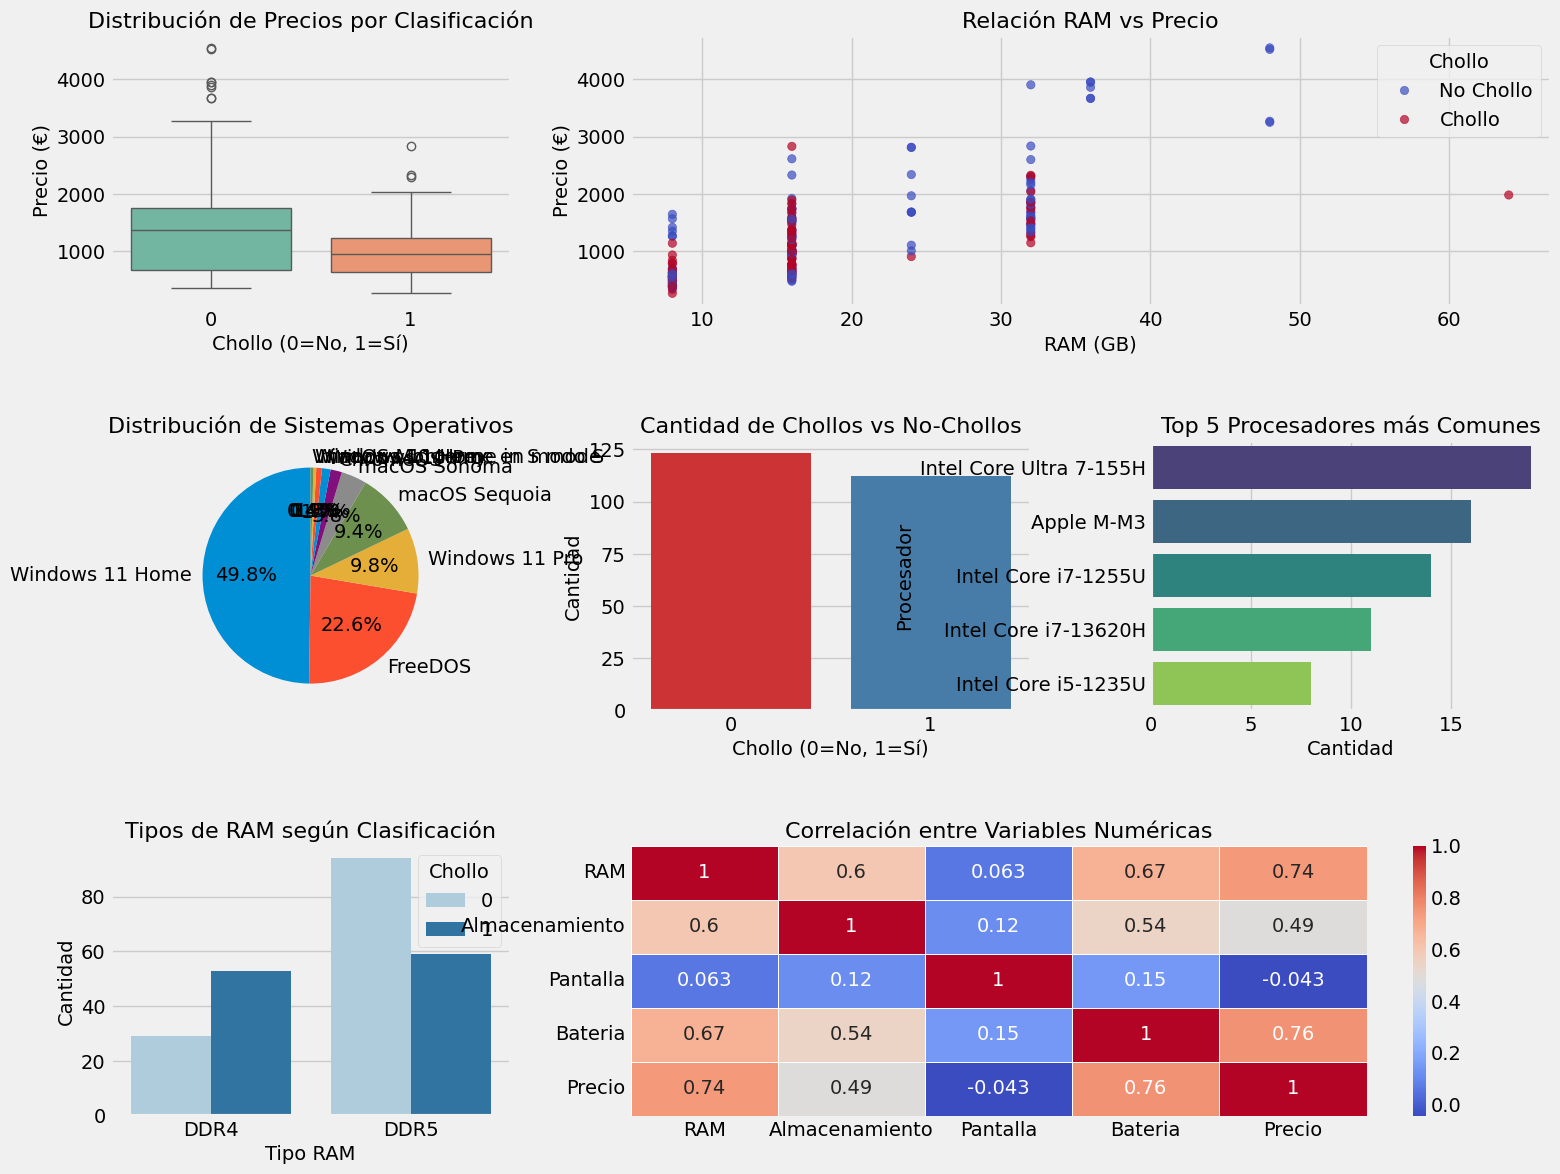

In [36]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Importar librerias necesarias
import matplotlib.pyplot as plt

# Configuración para visualizaciones
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

# Crear una figura principal con subplots - usar tight_layout en lugar de constrained_layout
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig)

# 1. Distribución de precios según chollo
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(x='Chollo', y='Precio', data=chollos_df, palette='Set2')
ax1.set_title('Distribución de Precios por Clasificación')
ax1.set_xlabel('Chollo (0=No, 1=Sí)')
ax1.set_ylabel('Precio (€)')

# 2. Relación RAM vs Precio con color por Chollo
ax2 = fig.add_subplot(gs[0, 1:3])
scatter = ax2.scatter(chollos_df['RAM'], chollos_df['Precio'], 
                      c=chollos_df['Chollo'], cmap='coolwarm', alpha=0.7)
ax2.set_title('Relación RAM vs Precio')
ax2.set_xlabel('RAM (GB)')
ax2.set_ylabel('Precio (€)')
legend_elements = scatter.legend_elements()[0]
ax2.legend([legend_elements[0], legend_elements[1]], ['No Chollo', 'Chollo'], title="Chollo")

# 3. Distribución de Sistemas Operativos
ax3 = fig.add_subplot(gs[1, 0])
os_counts = chollos_df['Sistema Operativo'].value_counts()
ax3.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Distribución de Sistemas Operativos')

# 4. Conteo de Chollos vs No-Chollos
ax4 = fig.add_subplot(gs[1, 1])
sns.countplot(x='Chollo', data=chollos_df, palette='Set1')
ax4.set_title('Cantidad de Chollos vs No-Chollos')
ax4.set_xlabel('Chollo (0=No, 1=Sí)')
ax4.set_ylabel('Cantidad')

# 5. Top 5 procesadores más comunes
ax5 = fig.add_subplot(gs[1, 2])
top_procesadores = chollos_df['Procesador'].value_counts().head(5)
sns.barplot(y=top_procesadores.index, x=top_procesadores.values, palette='viridis', ax=ax5)
ax5.set_title('Top 5 Procesadores más Comunes')
ax5.set_xlabel('Cantidad')

# 6. Distribución de tipos de RAM en Chollos vs No-Chollos
ax6 = fig.add_subplot(gs[2, 0])
sns.countplot(x='Tipo RAM', hue='Chollo', data=chollos_df, palette='Paired')
ax6.set_title('Tipos de RAM según Clasificación')
ax6.set_xlabel('Tipo RAM')
ax6.set_ylabel('Cantidad')

# 7. Correlación entre características numéricas
ax7 = fig.add_subplot(gs[2, 1:])
numeric_cols = ['RAM', 'Almacenamiento', 'Pantalla', 'Bateria', 'Precio']
correlation = chollos_df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax7)
ax7.set_title('Correlación entre Variables Numéricas')

# Estadísticas descriptivas
print("Estadísticas Descriptivas:\n")
print(chollos_df[['RAM', 'Almacenamiento', 'Pantalla', 'Bateria', 'Precio']].describe().round(2))

print("\nPorcentaje de Chollos en el dataset: {:.2f}%".format(
    chollos_df['Chollo'].mean() * 100))
# Ajustar el layout de forma manual con espacio para la figura completa
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.3, hspace=0.5)
plt.show()

# Transformació i normalització

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Definir columnas numéricas y categóricas
numeric_features = ['RAM', 'Almacenamiento', 'Pantalla', 'Bateria', 'Precio']
categorical_features = ['Procesador', 'Tipo RAM', 'Graficos', 'Resolucion', 'Sistema Operativo']

# Crear transformadores para cada tipo de columna
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Para manejar posibles valores nulos
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Para manejar posibles valores nulos 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 'ignore' permite manejar categorías nuevas
])

# Combinar transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [38]:
# Aplicar el preprocesamiento completo
X = chollos_df.drop('Chollo', axis=1)  # Características
y = chollos_df['Chollo']  # Variable objetivo

# Ajustar el preprocesador a los datos
preprocessor.fit(X)

# Transformar los datos originales
X_preprocessed = preprocessor.transform(X)

In [39]:
import joblib

# Obtener los nombres de las columnas después del one-hot encoding
onehotencoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = onehotencoder.get_feature_names_out(categorical_features)
feature_names = np.append(numeric_features, categorical_feature_names)

# X_preprocessed es un array disperso (sparse matrix) después del one-hot encoding
# Crear DataFrame con los datos transformados
X_preprocessed_dense = X_preprocessed.toarray() if hasattr(X_preprocessed, 'toarray') else X_preprocessed
df_pp = pd.DataFrame(X_preprocessed_dense, columns=feature_names, index=X.index)

# Guardar el preprocesador para uso futuro
#joblib.dump(preprocessor, 'preprocessor.pkl')

---

In [40]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas y categóricas
numeric_features = ['RAM', 'Almacenamiento', 'Pantalla', 'Bateria', 'Precio']
categorical_features = ['Procesador', 'Tipo RAM', 'Graficos', 'Resolucion', 'Sistema Operativo']

# Normalizar las columnas numéricas
scaler = StandardScaler()
numeric_data = scaler.fit_transform(chollos_df[numeric_features])

# Transformar las columnas categóricas en variables dummy
df_pp = pd.get_dummies(chollos_df, columns=categorical_features)
df_pp[numeric_features] = scaler.transform(df_pp[numeric_features])

df_pp

,RAM,Almacenamiento,Pantalla,Bateria,Precio,Chollo,Procesador_AMD 3000-3020E,Procesador_AMD Ryzen 3-7320U,Procesador_AMD Ryzen 3-7330U,Procesador_AMD Ryzen 5 PRO-7530U,...,Sistema Operativo_ChromeOS,Sistema Operativo_FreeDOS,Sistema Operativo_Windows 10 Home en modo S,Sistema Operativo_Windows 10 Pro,Sistema Operativo_Windows 11 Home,Sistema Operativo_Windows 11 Home in S mode,Sistema Operativo_Windows 11 Pro,Sistema Operativo_macOS Monterey,Sistema Operativo_macOS Sequoia,Sistema Operativo_macOS Sonoma
0,-1.069412,-0.487342,0.263947,0.724133,-0.888325,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1.439525,1.099674,1.796606,1.473024,0.775156,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1.439525,1.099674,0.714729,0.724133,0.279560,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,-0.233100,-0.487342,0.263947,0.724133,-0.367196,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1.439525,1.099674,1.796606,1.473024,0.279560,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,-1.069412,-0.487342,0.263947,-1.119293,-0.591968,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
243,1.439525,4.351757,-1.178555,1.012168,1.708074,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
244,-1.069412,-0.487342,0.263947,-0.888864,-0.824998,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
245,1.439525,1.099674,-1.809650,0.896954,1.201459,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [41]:
from sklearn.model_selection import train_test_split

#X = df_pp.drop(columns=['Chollo'])
#y = df_pp['Chollo']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

---

# Models

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((188, 122), (47, 122), (188,), (47,))

### Avaluar models

Random Forest: Media = 0.8982, Desviación = 0.0716
Gradient Boosting: Media = 0.9094, Desviación = 0.0406
SVM: Media = 0.8986, Desviación = 0.0525
Logistic Regression: Media = 0.9196, Desviación = 0.0707

Mejor modelo basado en validación cruzada: Logistic Regression con 0.9196 de precisión


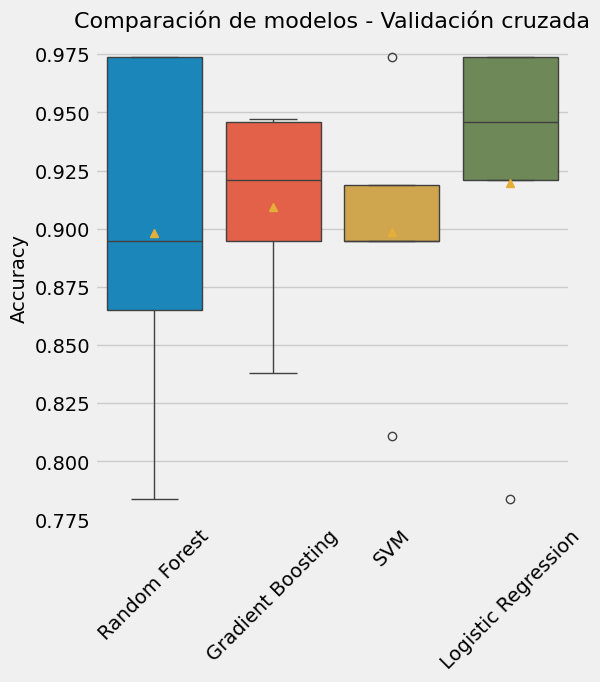

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Evaluar modelos con validación cruzada
results = {}
mean_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores
    mean_scores[name] = scores.mean()
    print(f"{name}: Media = {scores.mean():.4f}, Desviación = {scores.std():.4f}")

# Identificar el mejor modelo basado en la validación cruzada
best_model_name = max(mean_scores, key=mean_scores.get)
print(f"\nMejor modelo basado en validación cruzada: {best_model_name} con {mean_scores[best_model_name]:.4f} de precisión")

# Visualizar resultados de validación cruzada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=[results[m] for m in models.keys()], showmeans=True)
plt.xticks(range(len(models)), models.keys(), rotation=45)
plt.title('Comparación de modelos - Validación cruzada')
plt.ylabel('Accuracy')
plt.show()

- Línea dentro de la caja: Mediana (valor central de la distribución).
- Extremos de la caja: Primer cuartil (Q1, 25%) y tercer cuartil (Q3, 75%).
- Bigotes (líneas verticales): Rango dentro del cual caen la mayoría de los valores sin ser considerados valores atípicos.
- Puntos fuera de los bigotes: Outliers (valores atípicos).
- Triángulo verde: Media (promedio de la precisión obtenida).

### Entrenament


Mejor modelo basado en conjunto de prueba: Random Forest con 0.9787 de precisión
Precisión del modelo Gradient Boosting en conjunto de prueba: 0.9787


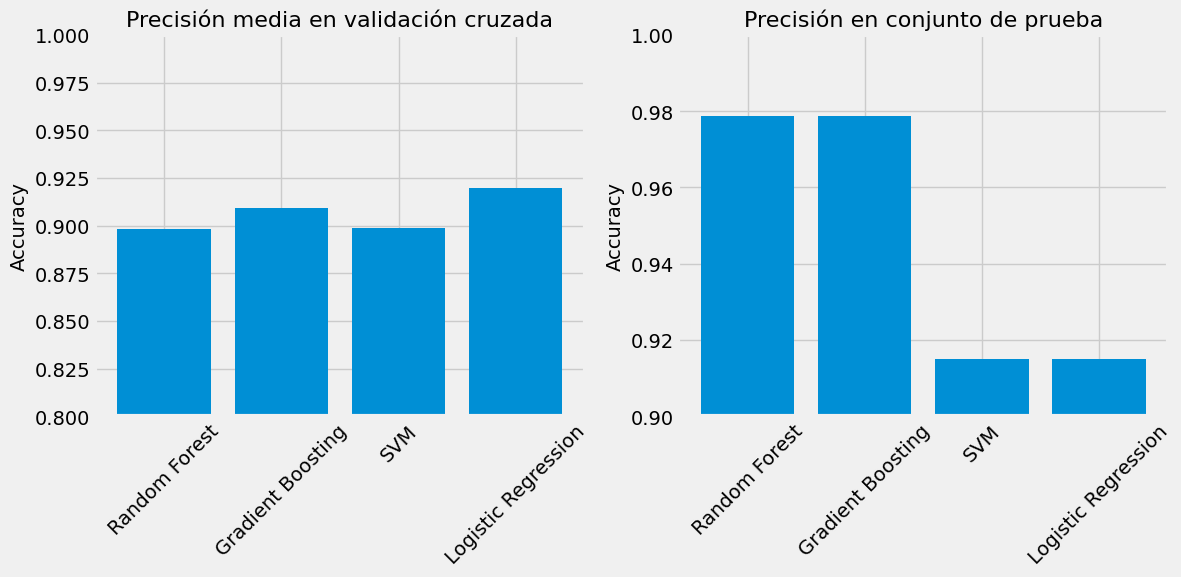

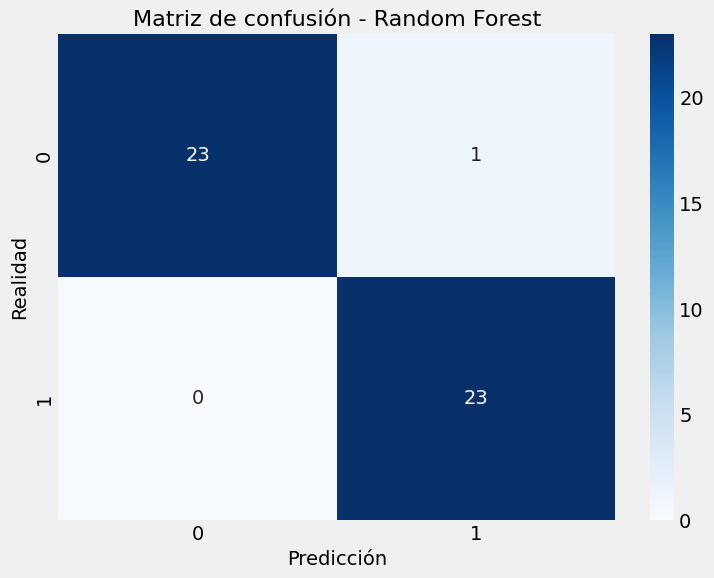

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        23

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



In [44]:
# Entrenar todos los modelos y evaluar en conjunto de prueba
test_accuracy = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy[name] = accuracy_score(y_test, y_pred)

# Elegir el mejor modelo basado en la precisión en el conjunto de prueba
best_model_name = max(test_accuracy, key=test_accuracy.get)
print(f"\nMejor modelo basado en conjunto de prueba: {best_model_name} con {test_accuracy[best_model_name]:.4f} de precisión")
print(f"Precisión del modelo Gradient Boosting en conjunto de prueba: {test_accuracy['Gradient Boosting']:.4f}")

# Visualizar resultados de precisión en conjunto de prueba
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(mean_scores.keys(), mean_scores.values())
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.title('Precisión media en validación cruzada')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.bar(test_accuracy.keys(), test_accuracy.values())
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.title('Precisión en conjunto de prueba')
plt.ylabel('Accuracy')
plt.tight_layout()

plt.show()

# Mostrar matriz de confusión del mejor modelo
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Matriz de confusión - {best_model_name}')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

### Búsqueda de hiperparàmetres
- GridSearchCV: Busca la mejor combinación de hiperparámetros en una cuadrícula predefinida.
- RandomizedSearchCV: Busca la mejor combinación de hiperparámetros en un espacio de búsqueda aleatorio. Se puede especificar el número de combinaciones a probar.
- Optuna: Busca la mejor combinación de hiperparámetros utilizando algoritmos de optimización bayesiana. Permite definir un espacio de búsqueda más flexible y eficiente. Optuna es más eficiente que GridSearchCV y RandomizedSearchCV, ya que utiliza algoritmos de optimización bayesiana para encontrar la mejor combinación de hiperparámetros. Esto significa que puede encontrar combinaciones óptimas en menos tiempo y con menos recursos computacionales.

### GridSearchCV


Mejores hiperparámetros para Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy en conjunto de prueba con el modelo optimizado: 0.9574

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.92      1.00      0.96        23

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47



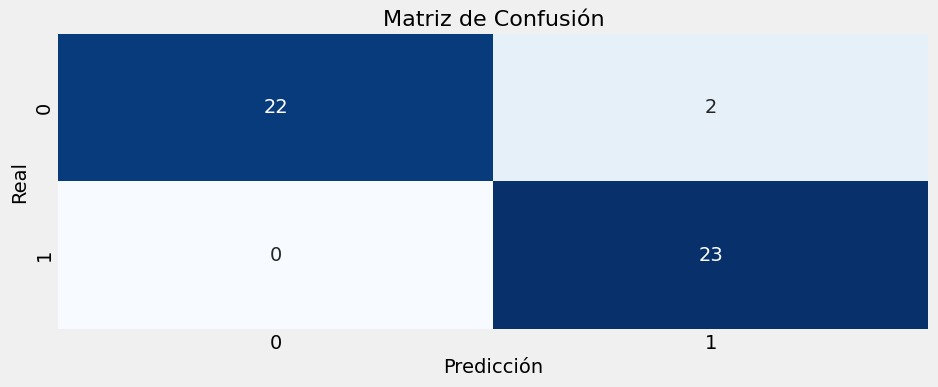

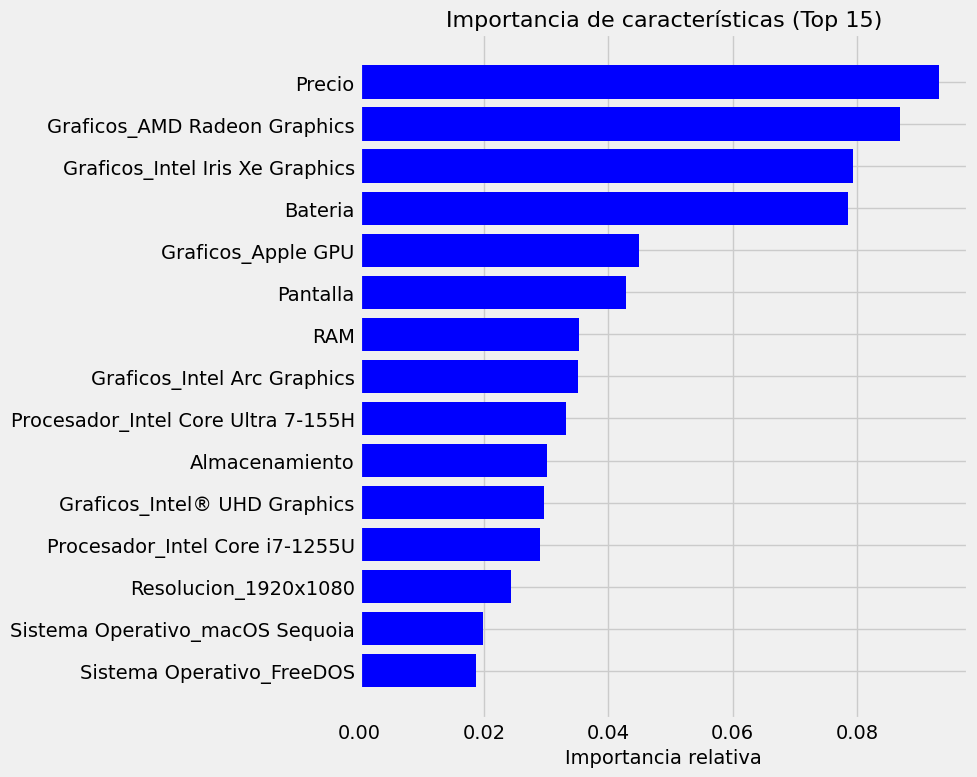

In [46]:
# Definir y el mejor modelo (basado en resultados de validación cruzada)
if best_model_name == 'Random Forest':
    # Ajuste fino de hiperparámetros para Random Forest
    best_model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
elif best_model_name == 'SVM':
    best_model = SVC(random_state=42, probability=True)
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }
else:
    best_model = LogisticRegression(random_state=42)
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }

# Búsqueda de hiperparámetros para el mejor modelo
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"\nMejores hiperparámetros para {best_model_name}:")
print(grid_search.best_params_)

# Predecir en conjunto de prueba y evaluar
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"\nAccuracy en conjunto de prueba con el modelo optimizado: {accuracy:.4f}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')

# Características más importantes (si el modelo lo permite)
if hasattr(best_model, 'feature_importances_'):
    # Obtener importancia de características
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15 características
    
    plt.figure(figsize=(10, 8))
    plt.title('Importancia de características (Top 15)')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Importancia relativa')
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, 'coef_'):
    # Para modelos lineales como Regresión Logística
    coef = np.abs(best_model.coef_[0])
    indices = np.argsort(coef)[-15:]  # Top 15 características
    
    plt.figure(figsize=(10, 8))
    plt.title('Coeficientes más importantes (Top 15)')
    plt.barh(range(len(indices)), coef[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.xlabel('Magnitud del coeficiente')
    plt.tight_layout()
    plt.show()

### Optuna

[I 2025-03-13 12:06:49,305] A new study created in memory with name: no-name-c646b2c8-2e67-4d6f-b2f1-2b0cea7d11bc
[I 2025-03-13 12:06:49,990] Trial 0 finished with value: 0.8668563300142248 and parameters: {'n_estimators': 187, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.8668563300142248.
[I 2025-03-13 12:06:50,487] Trial 1 finished with value: 0.8291607396870555 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8668563300142248.
[I 2025-03-13 12:06:50,859] Trial 2 finished with value: 0.8931721194879089 and parameters: {'n_estimators': 176, 'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.8931721194879089.
[I 2025-03-13 12:06:51,067] Trial 3 finished with value: 0.8985775248933143 

Mejor precisión en validación cruzada: 0.9198
Mejores hiperparámetros: {'n_estimators': 166, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}

Precisión en conjunto de prueba con modelo optimizado por Optuna: 0.9787


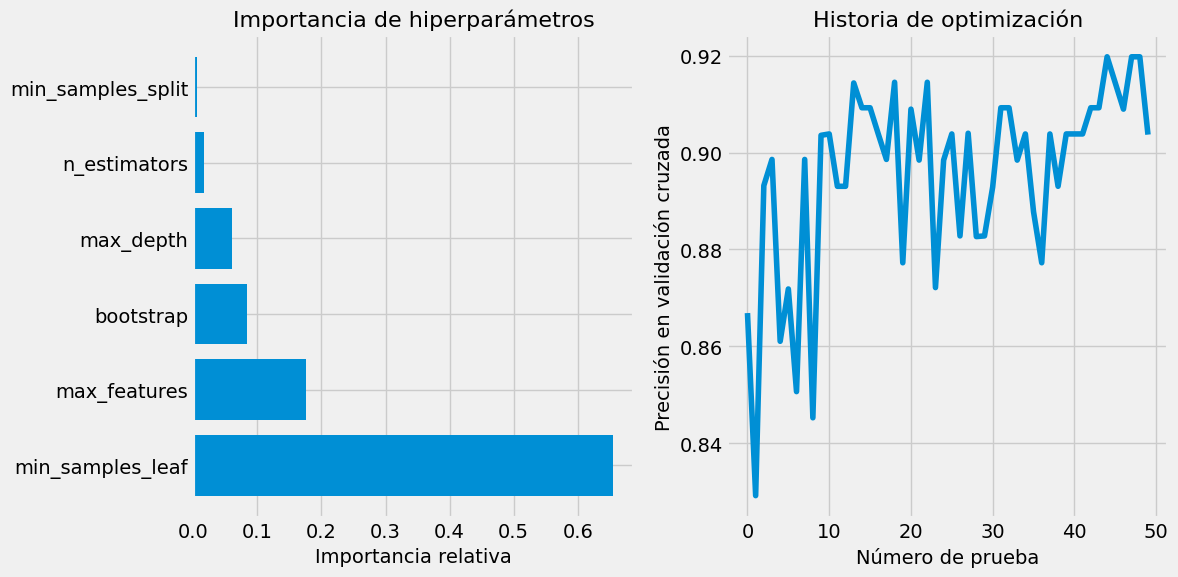


Comparación de modelos optimizados:
Precisión con GridSearch: 0.9574
Precisión con Optuna: 0.9787
Mejora: 2.22%

Se usará el modelo optimizado por Optuna como modelo final.


In [48]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

# Definir función objetivo para Optuna
def objective(trial, X=X_train, y=y_train):
    # Seleccionar el tipo de modelo según el mejor encontrado anteriormente
    if best_model_name == 'Random Forest':
        # Parámetros a optimizar para Random Forest
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
            'random_state': 42
        }
        model = RandomForestClassifier(**params)
    
    elif best_model_name == 'Gradient Boosting':
        # Parámetros a optimizar para Gradient Boosting
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
            'random_state': 42
        }
        model = GradientBoostingClassifier(**params)
    
    elif best_model_name == 'SVM':
        # Parámetros a optimizar para SVM
        params = {
            'C': trial.suggest_float('C', 0.1, 10.0, log=True),
            'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
            'kernel': trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid']),
            'probability': True,
            'random_state': 42
        }
        model = SVC(**params)
    
    else:  # Logistic Regression
        # Parámetros a optimizar para Logistic Regression
        params = {
            'C': trial.suggest_float('C', 0.01, 10.0, log=True),
            'solver': trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
            'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', 'none']),
            'max_iter': 1000,
            'random_state': 42
        }
        
        # Ajustar la penalización según el solver (no todas las combinaciones son válidas)
        if params['solver'] == 'liblinear':
            params['penalty'] = 'l1' if params['penalty'] == 'elasticnet' else params['penalty']
        elif params['solver'] in ['newton-cg', 'sag', 'lbfgs']:
            params['penalty'] = 'l2' if params['penalty'] == 'l1' or params['penalty'] == 'elasticnet' else params['penalty']
        
        model = LogisticRegression(**params)

    # Validación cruzada para evaluar el modelo
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# Crear estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Número de pruebas a realizar

# Obtener los mejores hiperparámetros
best_params = study.best_params
best_score = study.best_value
print(f"Mejor precisión en validación cruzada: {best_score:.4f}")
print(f"Mejores hiperparámetros: {best_params}")

# Crear el mejor modelo con los parámetros optimizados
if best_model_name == 'Random Forest':
    optimized_model = RandomForestClassifier(**best_params)
elif best_model_name == 'Gradient Boosting':
    optimized_model = GradientBoostingClassifier(**best_params)
elif best_model_name == 'SVM':
    optimized_model = SVC(**best_params, probability=True)
else:
    optimized_model = LogisticRegression(**best_params)

# Entrenar el modelo optimizado en todo el conjunto de entrenamiento
optimized_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_optuna = optimized_model.predict(X_test)
accuracy_optuna = accuracy_score(y_test, y_pred_optuna)
print(f"\nPrecisión en conjunto de prueba con modelo optimizado por Optuna: {accuracy_optuna:.4f}")

# Visualización de los resultados de la optimización
plt.figure(figsize=(12, 6))

# Gráfico de importancia de hiperparámetros
param_importances = optuna.importance.get_param_importances(study)
plt.subplot(1, 2, 1)
importances = list(param_importances.items())
importances.sort(key=lambda x: x[1], reverse=True)
params = [imp[0] for imp in importances]
values = [imp[1] for imp in importances]
plt.barh(range(len(params)), values, align='center')
plt.yticks(range(len(params)), params)
plt.title('Importancia de hiperparámetros')
plt.xlabel('Importancia relativa')

# Gráfico de historia de optimización
plt.subplot(1, 2, 2)
plt.plot(range(len(study.trials)), [t.value for t in study.trials])
plt.title('Historia de optimización')
plt.xlabel('Número de prueba')
plt.ylabel('Precisión en validación cruzada')

plt.tight_layout()
plt.show()

# Comparar con el mejor modelo encontrado por GridSearch
print("\nComparación de modelos optimizados:")
print(f"Precisión con GridSearch: {accuracy:.4f}")
print(f"Precisión con Optuna: {accuracy_optuna:.4f}")
print(f"Mejora: {100 * (accuracy_optuna - accuracy) / accuracy:.2f}%")

# Si hay mejora, usar el modelo optimizado por Optuna como el mejor modelo final
if accuracy_optuna > accuracy:
    best_model = optimized_model
    print("\nSe usará el modelo optimizado por Optuna como modelo final.")
else:
    print("\nSe mantiene el modelo optimizado por GridSearch como modelo final.")

# Guardar el model

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(best_model, 'model_chollo.pkl')

['modelo_chollo.pkl']